In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
from skimpy import skim

In [2]:
loan=pd.read_csv(r"C:\Users\91779\stats_project.csv")
loan

,Unnamed: 0,customerid,age,salary,balance,marital,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,education,months,years
0,0,1,58.0,100000.0,2143,married,yes,no,yes,no,...,4.35,1,-1,0,unknown,no,management,tertiary,may,2017.0
1,1,2,44.0,60000.0,29,single,yes,no,yes,no,...,2.52,1,-1,0,unknown,no,technician,secondary,may,2017.0
2,2,3,33.0,120000.0,2,married,yes,no,yes,yes,...,1.27,1,-1,0,unknown,no,entrepreneur,secondary,may,2017.0
3,3,4,47.0,20000.0,1506,married,no,no,yes,no,...,1.53,1,-1,0,unknown,no,blue-collar,unknown,may,2017.0
4,4,5,33.0,0.0,1,single,no,no,no,no,...,3.30,1,-1,0,unknown,no,unknown,unknown,may,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,45207,51.0,60000.0,825,married,yes,no,no,no,...,16.28,3,-1,0,unknown,yes,technician,tertiary,nov,2017.0
45207,45207,45208,71.0,55000.0,1729,divorced,yes,no,no,no,...,7.60,2,-1,0,unknown,yes,retired,primary,nov,2017.0
45208,45208,45209,72.0,55000.0,5715,married,yes,no,no,no,...,18.78,5,184,3,success,yes,retired,secondary,nov,2017.0
45209,45209,45210,57.0,20000.0,668,married,yes,no,no,no,...,8.47,4,-1,0,unknown,no,blue-collar,secondary,nov,2017.0


In [3]:
loan.drop(("Unnamed: 0"),axis=True,inplace=True)

    #Step - 1 - Introduction -> Give a detailed data description and objectiv
        the data belong to the year of 2017
        The data is related to direct marketing campaigns of a Portuguese banking institution. The
        marketing campaigns were based on phone calls. Often, more than one contact to the same client
        was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no')
        subscribed.



In [4]:
#Step - 2 - Import the data and display the head, shape and description of the data.
#head
loan.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,job,education,months,years
0,1,58.0,100000.0,2143,married,yes,no,yes,no,unknown,...,4.35,1,-1,0,unknown,no,management,tertiary,may,2017.0
1,2,44.0,60000.0,29,single,yes,no,yes,no,unknown,...,2.52,1,-1,0,unknown,no,technician,secondary,may,2017.0
2,3,33.0,120000.0,2,married,yes,no,yes,yes,unknown,...,1.27,1,-1,0,unknown,no,entrepreneur,secondary,may,2017.0
3,4,47.0,20000.0,1506,married,no,no,yes,no,unknown,...,1.53,1,-1,0,unknown,no,blue-collar,unknown,may,2017.0
4,5,33.0,0.0,1,single,no,no,no,no,unknown,...,3.30,1,-1,0,unknown,no,unknown,unknown,may,2017.0


In [5]:
skim(loan)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 45211  │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 22     │ │ int32       │ 6     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0      ┃ p25     ┃ p75     ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ customerid       │    0 │      0 │    23000 │    13000 │       1 │   11000 │   34000 │    45000 │  ██████  │  │
│ │ age              │    0 │      0 │       41 │       11 │      18 │      33 │      48 │       95 │   ▃█▅▁   │  │
│ │ salary           │    0 │      0 │    57000 │    32000 │       0 │   20000 │   70000 │   120000 │  ▂▆▄█ ▇  │  │
│ │ balance          │    0 │      0 │     1400 │     3000 │   -8000 │      72 │    1400 │   100000 │    █     │  │
│ │ day              │    0 │      0 │       16 │      8.3 │       1 │       8 │      21 │       31 │  ▅▆▆█▄▆  │  │
│ │ duration         │    0 │      0 │      4.3 │      4.3 │       0 │     1.7 │     5.3 │       82 │    █     │  │
│ │ campaign         │    0 │      0 │      2.8 │      3.1 │       1 │       1 │       3 │       63 │    █     │  │
│ │ pdays            │    0 │      0 │       40 │      100 │      -1 │      -1 │      -1 │      870 │   █▁▁    │  │
│ │ previous         │    0 │      0 │     0.58 │      2.3 │       0 │       0 │       0 │      280 │    █     │  │
│ │ years            │   50 │   0.11 │     2000 │        0 │    2000 │    2000 │    2000 │     2000 │      █   │  │
│ └──────────────────┴──────┴────────┴──────────┴──────────┴─────────┴─────────┴─────────┴──────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ marital                   │       0 │          0 │                            1 │                    45000 │  │
│ │ targeted                  │       0 │          0 │                            1 │                    45000 │  │
│ │ default                   │       0 │          0 │                            1 │                    45000 │  │
│ │ housing                   │       0 │          0 │                            1 │                    45000 │  │
│ │ loan                      │       0 │          0 │                            1 │                    45000 │  │
│ │ contact                   │       0 │          0 │                            1 │                    45000 │  │
│ │ month                     │      50 │       0.11 │  

In [6]:
#shape of the data
print("Number of columns",len(loan.columns),"Number of Rows",len(loan))

Number of columns 22 Number of Rows 45211


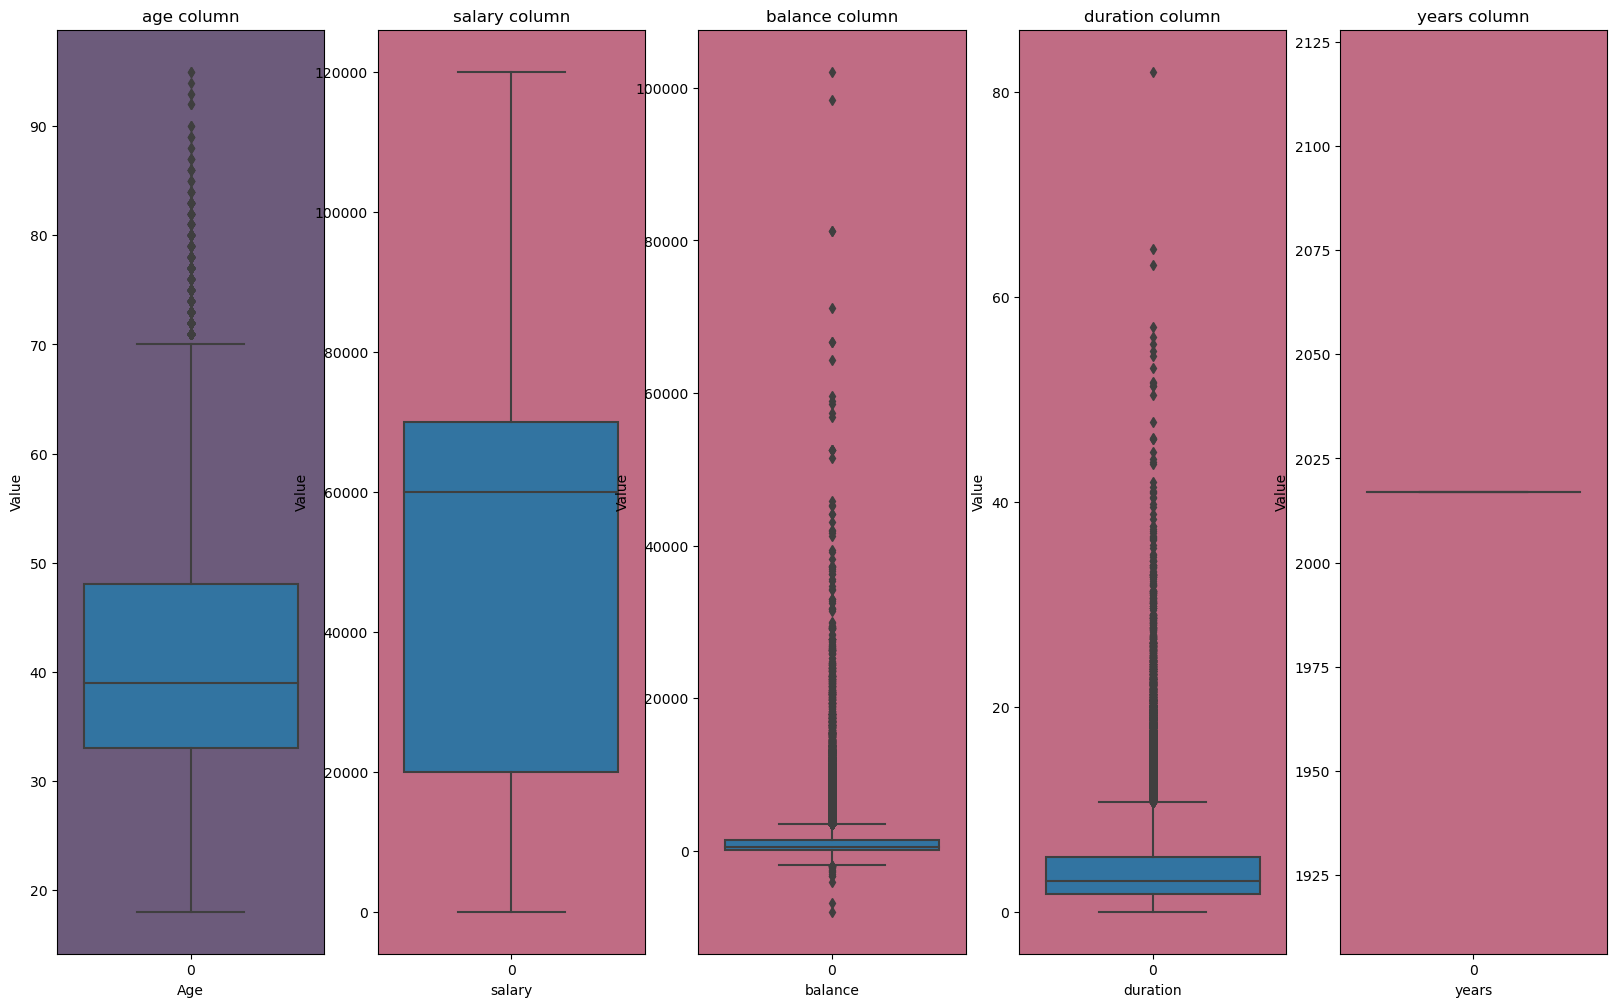

In [7]:
#description of the data and finding outliers
fig,axes=plt.subplots(1,5,figsize=(20,12))
sns.boxplot(loan["age"],ax=axes[0])
axes[0].set_title("age column")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Value")
axes[0].set_facecolor("#6c5b7b")
#box plot for salary
sns.boxplot(loan["salary"],ax=axes[1])
axes[1].set_title("salary column")
axes[1].set_xlabel("salary")
axes[1].set_ylabel("Value")
axes[1].set_facecolor("#c06c84")
#box plot balance
sns.boxplot(loan["balance"],ax=axes[2])
axes[2].set_title("balance column")
axes[2].set_xlabel("balance")
axes[2].set_ylabel("Value")
axes[2].set_facecolor("#c06c84")
#box plot duration
sns.boxplot(loan["duration"],ax=axes[3])
axes[3].set_title("duration column")
axes[3].set_xlabel("duration")
axes[3].set_ylabel("Value")
axes[3].set_facecolor("#c06c84")
#box plot duration
sns.boxplot(loan["years"],ax=axes[4])
axes[4].set_title("years column")
axes[4].set_xlabel("years")
axes[4].set_ylabel("Value")
axes[4].set_facecolor("#c06c84")



In [8]:
loan.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'targeted',
       'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response', 'job',
       'education', 'months', 'years'],
      dtype='object')

## Finding the duplicates in data

In [9]:
loan.duplicated().sum()

0

# Handling Null values in the data set

In [10]:
loan.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response       0
job            0
education      0
months        50
years         50
dtype: int64

## Describeing the data


In [11]:
# loan.describe() to get summary statistics for the numerical columns
loan.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue").bar(subset=["min"],color="violet")\
.bar(subset=["max"],color="pink")

,count,mean,std,min,25%,50%,75%,max
salary,45211.000000,57084.453698,32016.099611,0.000000,20000.000000,60000.000000,70000.000000,120000.000000
customerid,45211.000000,22606.000000,13051.435847,1.000000,11303.500000,22606.000000,33908.500000,45211.000000
years,45161.000000,2017.000000,0.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
balance,45211.000000,1362.272058,3044.765829,-8019.000000,72.000000,448.000000,1428.000000,102127.000000
age,45211.000000,40.934795,10.616926,18.000000,33.000000,39.000000,48.000000,95.000000
pdays,45211.000000,40.197828,100.128746,-1.000000,-1.000000,-1.000000,-1.000000,871.000000
day,45211.000000,15.806419,8.322476,1.000000,8.000000,16.000000,21.000000,31.000000
duration,45211.000000,4.302729,4.292132,0.000000,1.720000,3.000000,5.320000,81.970000
campaign,45211.000000,2.763841,3.098021,1.000000,1.000000,2.000000,3.000000,63.000000
previous,45211.000000,0.580323,2.303441,0.000000,0.000000,0.000000,0.000000,275.000000


In [12]:
#describeing the data types of all the columns
loan.dtypes

customerid      int64
age           float64
salary        float64
balance         int64
marital        object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration      float64
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
job            object
education      object
months         object
years         float64
dtype: object

In [13]:
#filling null values in month feature 
loan[["months"]].isnull().sum()

months    50
dtype: int64

# Mode
when missing values in your data set are categorical and discrete you can use the mode value to fill in the missing values

In [14]:
loan["months"].fillna(loan["months"].mode(),inplace=True)
loan["months"].isnull().sum()

50

filling null values in year column["year"]
### when the data is in a normal distrubution you can fill with mean  when data is not in normal distribution we can fill it with mean

        #checking data in Nd or Not with help of The Shapiro-Wilk test is a statistical test used to determine whether a data sample is Gaussian or not. In other words, it tests the hypothesis that a sample comes from a normally distributed population.
        
        With help of Graph|
        #And  You can use the hist() and qqplot() functions from the matplotlib library to create these plots.

In [15]:
#statistical method # hypothesis method null,and alternative hypothesis
from scipy.stats import shapiro
stat,p=shapiro(loan["years"][0:4000])
#h0=The data follows Nd
#h1=the data does not follow Nd
print('Test statistic:', stat)
print('p-value:', p)
p=0.05 #5% rejection
if p<0.05:
    print("The data does not follow  normal distribuition(ho is rejected)")
else:
    print("the data follows normal distribution(failed to reject h0)")
#Note When we have missing values we can find normal distribution better to use plotting 

Test statistic: nan
p-value: 1.0
the data follows normal distribution(failed to reject h0)


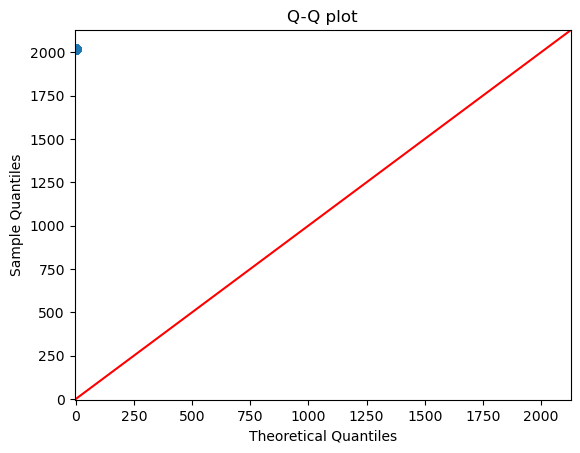

In [16]:
#qq plot known as (quantile-quantile) plot
pl=loan["years"].values
#Create a Q-Q plot of the data
fig,ax = plt.subplots()
sm.qqplot(pl,line='45', ax=ax)
ax.set_title('Q-Q plot')
plt.show()

C:\Users\91779\AppData\Local\Temp\ipykernel_3336\2646724316.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  pdf=(1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x_axis - mean)**2 / (2 * std_dev**2)))
C:\Users\91779\AppData\Local\Temp\ipykernel_3336\2646724316.py:6: RuntimeWarning: invalid value encountered in divide
  pdf=(1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x_axis - mean)**2 / (2 * std_dev**2)))
C:\Users\91779\AppData\Local\Temp\ipykernel_3336\2646724316.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(year, hist=True, kde=True, bins=30, color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})

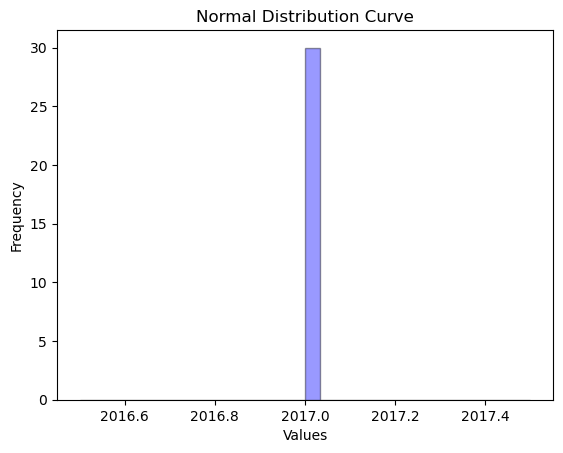

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [17]:
year=loan['years']
mean= np.mean(year)
std_dev=np.std(year)
mean,std_dev
x_axis = np.linspace(min(year), max(year),2000)
pdf=(1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x_axis - mean)**2 / (2 * std_dev**2)))
sns.distplot(year, hist=True, kde=True, bins=30, color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
plt.plot(x_axis, pdf, color='red', linewidth=2)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Normal Distribution Curve')
plt.show()
plt.figure(figsize=(20,20)) 

In [18]:
loan["years"].fillna(loan["years"].mean(),inplace=True)

Text(0.5, 1.0, ' Balance Amount present customers Bank')

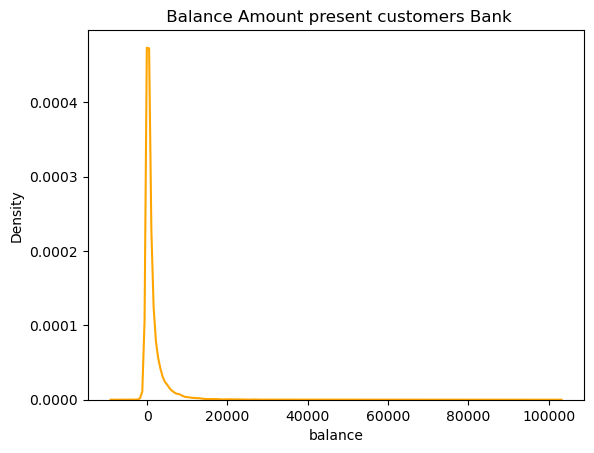

In [19]:
#- Univariate Analysis -> PDF, Histograms, Boxplots, Count plots, etc..
#density plot for univarient
import seaborn as sns
sns.kdeplot(loan["balance"],color="orange")
plt.title(" Balance Amount present customers Bank")

C:\Users\91779\AppData\Local\Temp\ipykernel_3336\1272561781.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan["salary"],hist=True,kde=True,color="red")


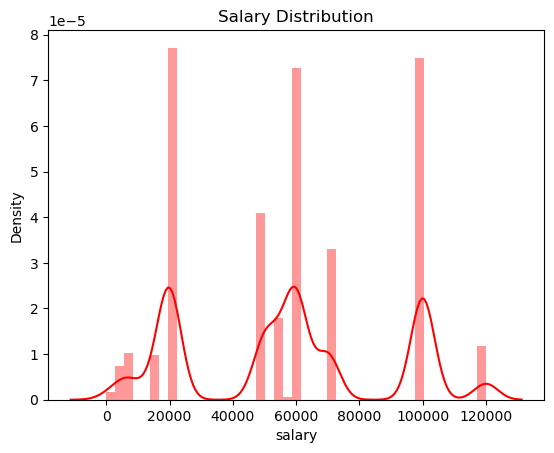

In [20]:
sns.distplot(loan["salary"],hist=True,kde=True,color="red")
plt.title("Salary Distribution")
plt.show()
#majority of people are with fixed salary 20000,60000,100000

In [21]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'The Density of age group')

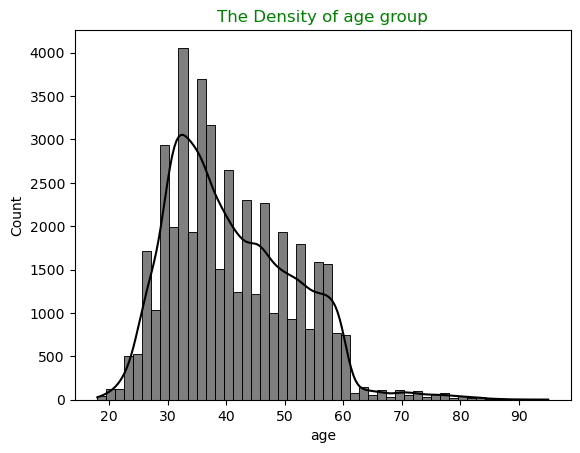

In [22]:
sns.histplot(loan["age"],bins=50,kde=True,color="black")
plt.title("The Density of age group",color="Green")
#As for density plot is observed that age group between 25 to 55  as higher denstity

In [23]:
loan["response"].value_counts()

no     39924
yes     5287
Name: response, dtype: int64

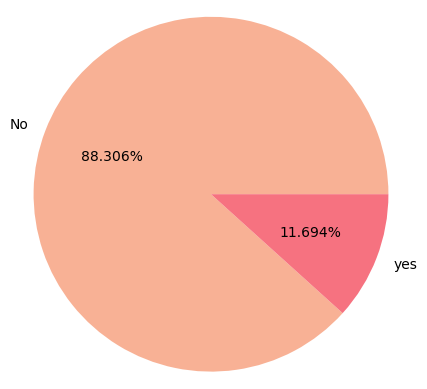

In [63]:
color=['#f8b195', '#f67280']
plt.pie(loan["response"].value_counts(),labels=["No","yes"],autopct="%0.3f%%",radius=1.2,colors=color)
plt.show()
#out of 100% only 11.7% said yes to our responses

<Axes: xlabel='marital', ylabel='count'>

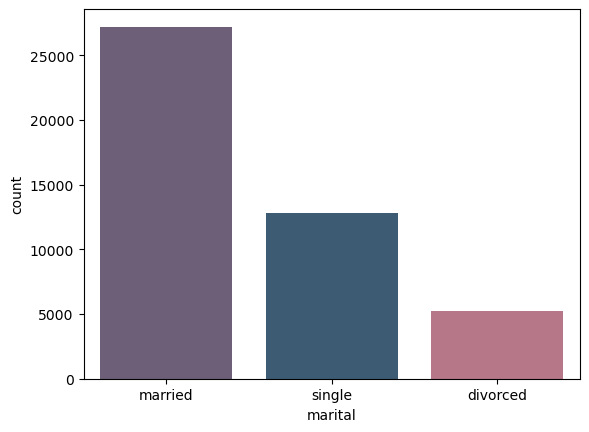

In [66]:
colors=["#6c5b7b", "#355c7d","#c06c84"]
color=colors
sns.countplot(x="marital",data=loan,palette=colors)
#in total population the majority are married second followed by single and 3rd by divorsed

pdf:probality denstiy function :is used in normal distribution for contineous data
        pdf:will take exact value at a partical position
            stats.norm.cdf(x,mean,std)

(array([39924.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5287.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

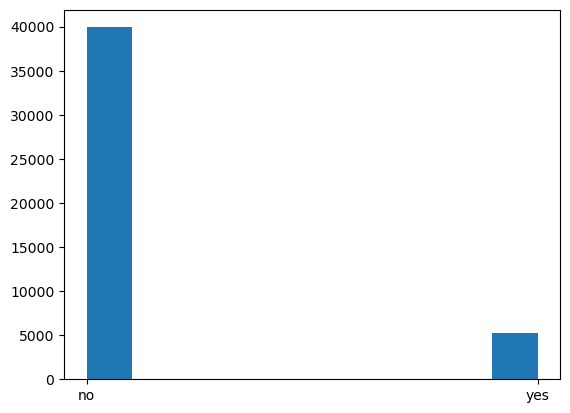

In [69]:
plt.hist(loan["response"])
#about 40000 people has said no to ivestement only 5000 people said yes 

In [ ]:
pd.crosstab(loan["marital"],loan["response"],normalize=True)

In [ ]:
 data=pd.crosstab(loan["marital"],loan["response"],margins=True)
data

In [26]:
probality_data=pd.crosstab(loan["marital"],loan["response"],margins=True)/len(loan)
data=probality_data.round(decimals=4)
data


response,no,yes,All
marital,,,
divorced,0.1014,0.0138,0.1152
married,0.5410,0.0609,0.6019
single,0.2406,0.0423,0.2829
All,0.8831,0.1169,1.0000


In [27]:
p_yes=data.yes.All
p_no=data.no.All
p_yes,p_no

(0.1169, 0.8831)

In [28]:
p_all_divorced=data.All.divorced
p_all_married=data.All.married
p_all_single=data.All.single
p_all_divorced,p_all_married,p_all_single

(0.1152, 0.6019, 0.2829)

In [29]:
#p(yes/divorced)=p(yes/divorced)/p_divorced_all
p_givenyes_divorced=data.yes.divorced
p_yes_divorced=p_givenyes_divorced/p_all_divorced
p_yes_divorced.round(decimals=4)

0.1198

In [30]:
#p(yes/married)=p(yes/married)/p_married_all
p_given_yes_married=data.yes.married
p_yes_married=p_given_yes_married/p_all_married
p_yes_married

0.10117959793985712

In [31]:
#p(yes/single)=p(yes_married)/P_married_all
P_given_yes_single=data.yes.single
p_yes_single=P_given_yes_single/p_all_single
p_yes_single

0.14952279957582185

In [32]:
def pro(x,y,z):
    if x>y and x>z:
        return(x," divorced has more probality")
    elif y>x and y>z:
        return(y," married has more probality")
    elif z>x and z>y:
        return(z,"single has more probality of investing ")
    
pro(p_yes_divorced,p_yes_married,p_yes_single)

(0.14952279957582185, 'single has more probality of investing ')

          The probality of single saying response to yes is greater  so we can concentrate more on singles because the probality of getting the yes from singles is more

In [33]:
k=loan.groupby("marital")
k.ngroups

3

In [34]:
len(k.get_group("divorced")),"=divorced",len(k.get_group("married")),"=married",len(k.get_group("single")),"=single"

(5207, '=divorced', 27214, '=married', 12790, '=single')

In [35]:
z=loan.groupby(["marital","response"])
len(z.get_group(("single","yes")))

1911

In [36]:
def gi(x,y):
    z=loan.groupby(["marital","response"])
    return len(z.get_group((x,y)))
gi("married","yes"),gi("divorced","yes"),gi("single","yes")
    

(2754, 622, 1911)

In [38]:
def job(x,y):
        l=loan.groupby(["job","response"])
        return len(l.get_group((x,y)))
job("management","yes"),job("technician", "yes"),job("entrepreneur","yes"),job("blue-collar", "yes")

(1301, 840, 123, 708)

Find the outliers in each numerical column

In [39]:
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact,interact_manual

In [40]:
@interact_manual
def groupy_(col1=loan.select_dtypes('number').columns):
    plt.figure(figsize=(5,3)),sns.boxplot(loan[col1]),plt.xlabel(col1),plt.show()
    

interactive(children=(Dropdown(description='col1', options=('customerid', 'age', 'salary', 'balance', 'day', '…

Understand the probability and frequency distribution of each numerical column

In [41]:
@interact_manual
def groupby_(col1=loan.select_dtypes('number').columns):
    plt.figure(figsize=(3,3)),plt.hist(loan[col1]),plt.xlabel(col1),plt.show()

interactive(children=(Dropdown(description='col1', options=('customerid', 'age', 'salary', 'balance', 'day', '…

In [42]:
@interact_manual
def groupby_(col1=loan.select_dtypes("number").columns[1:],
            col2=loan.select_dtypes("number").columns[1:]):
            sns.scatterplot(x=col1,y=col2,data=loan)
            plt.title(col1 and col2)
            plt.show()

interactive(children=(Dropdown(description='col1', options=('age', 'salary', 'balance', 'day', 'duration', 'ca…

Understand the frequency distribution of each categorical Variable/Column

In [43]:
@interact_manual
def groupby_(col1=loan.select_dtypes('object').columns):
    plt.figure(figsize=(3,3)),sns.countplot(x=loan[col1]),plt.xlabel(col1),plt.xticks(rotation=90),plt.show()

interactive(children=(Dropdown(description='col1', options=('marital', 'targeted', 'default', 'housing', 'loan…

In [44]:
loan.corr()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,years
customerid,1.000000,0.014922,0.040000,0.073639,-0.061465,0.013026,-0.102884,0.437729,0.271098,NaN
age,0.014922,1.000000,0.026232,0.097753,-0.009185,-0.004645,0.004851,-0.023795,0.001302,NaN
salary,0.040000,0.026232,1.000000,0.056322,0.027688,-0.010091,0.015300,-0.015560,0.014186,NaN
balance,0.073639,0.097753,0.056322,1.000000,0.004503,0.021564,-0.014578,0.003435,0.016674,NaN
day,-0.061465,-0.009185,0.027688,0.004503,1.000000,-0.030209,0.162490,-0.093044,-0.051710,NaN
duration,0.013026,-0.004645,-0.010091,0.021564,-0.030209,1.000000,-0.084569,-0.001569,0.001205,NaN
campaign,-0.102884,0.004851,0.015300,-0.014578,0.162490,-0.084569,1.000000,-0.088628,-0.032855,NaN
pdays,0.437729,-0.023795,-0.015560,0.003435,-0.093044,-0.001569,-0.088628,1.000000,0.454820,NaN
previous,0.271098,0.001302,0.014186,0.016674,-0.051710,0.001205,-0.032855,0.454820,1.000000,NaN
years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Compute the correlation matrix for a DataFrame named 'df'
corr=loan.corr()
# Apply a background gradient to the correlation matrix to visualize the correlation strength
# Use the 'coolwarm' color map to represent positive correlations in shades of red and negative correlations in shades of blue
corr.style.background_gradient(cmap="coolwarm")

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,years
customerid,1.000000,0.014922,0.040000,0.073639,-0.061465,0.013026,-0.102884,0.437729,0.271098,nan
age,0.014922,1.000000,0.026232,0.097753,-0.009185,-0.004645,0.004851,-0.023795,0.001302,nan
salary,0.040000,0.026232,1.000000,0.056322,0.027688,-0.010091,0.015300,-0.015560,0.014186,nan
balance,0.073639,0.097753,0.056322,1.000000,0.004503,0.021564,-0.014578,0.003435,0.016674,nan
day,-0.061465,-0.009185,0.027688,0.004503,1.000000,-0.030209,0.162490,-0.093044,-0.051710,nan
duration,0.013026,-0.004645,-0.010091,0.021564,-0.030209,1.000000,-0.084569,-0.001569,0.001205,nan
campaign,-0.102884,0.004851,0.015300,-0.014578,0.162490,-0.084569,1.000000,-0.088628,-0.032855,nan
pdays,0.437729,-0.023795,-0.015560,0.003435,-0.093044,-0.001569,-0.088628,1.000000,0.454820,nan
previous,0.271098,0.001302,0.014186,0.016674,-0.051710,0.001205,-0.032855,0.454820,1.000000,nan
years,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [46]:
loan["response"].value_counts()

no     39924
yes     5287
Name: response, dtype: int64

In [48]:
from scipy.stats import boxcox, probplot
from ipywidgets import interact_manual

def check_normality(data, columns):
    """
    Check whether the specified columns in a pandas dataframe follow a normal distribution,
    and apply Box-Cox transformation to non-normal columns to make them more normally distributed.
    
    """
    # iterate over the specified columns
    for column in columns:
        # extract the column of interest
        col = loan[column]
        
        # plot a histogram to visualize the distribution
        plt.hist(col, bins=20)
        plt.title(column)
        plt.show()

        # create a probability plot (Q-Q plot) to compare to a normal distribution
        probplot(col, dist='norm', plot=plt)
        plt.title(column)
        plt.show()

     # try performing a Box-Cox transformation on the column
     #he Box-Cox transformation requires the data to be positive. 
    
    #If your column contains negative or zero values, you will need to apply a different transformation.
        try:
            transformed, _ = boxcox(col)
            # plot the histogram of the transformed data
            plt.hist(transformed, bins=20)
            plt.title(f'Transformed {column}')
            plt.show()

            # plot a probability plot of the transformed data
            probplot(transformed, dist='norm', plot=plt)
            plt.title(f'Transformed {column}')
            plt.show()

        # handle the case where the data is non-positive
        except ValueError:
            print(f'{column} column cannot be transformed due to non-positive data')

# load data into a pandas dataframe
loan
@interact_manual(columns=loan.select_dtypes(include=np.number).columns.tolist())
def test_normality(columns):
    # split the comma-separated string of column names into a list
    columns_list = [col.strip() for col in columns.split(',')]

    # check normality and perform Box-Cox transformation
    check_normality(loan,columns_list)

interactive(children=(Dropdown(description='columns', options=('customerid', 'age', 'salary', 'balance', 'day'…

In [49]:
# Pearson Correlation Coefficient is a statistical measure that measures the strength of the linear relationship between two continuous variables. 
#It is denoted by the symbol r and can range from -1 to 1. A value of -1 indicates a perfect negative linear relationship, 
#a value of 0 indicates no linear relationship, and a value of 1 indicates a perfect positive linear relationship.


#Pearson correlation coefficient between salary and age
corr_coef, p_val = stats.pearsonr(loan['salary'], loan['age'])
print('Pearson correlation coefficient: {:.4f}'.format(corr_coef))
print('p-value: {:.4f}'.format(p_val))


Pearson correlation coefficient: 0.0262
p-value: 0.0000


In [71]:
#Finding the that two coljumns are dependent or independent with help of chi-square testing 
from scipy.stats import chi2_contingency
#h0=dependent
#h1=independent
category_column="housing"
target_column="response"
contigency_table=pd.crosstab(loan[category_column],loan[target_column])
contigency_table
#chi1 square test on columns 
chi2,p_value, _, _ =chi2_contingency(contigency_table)
alpha=0.05
if p_value>alpha:
    print("the features are  not dependent AND(HO IS REJECTED)")
else:
    print("The feature are dependent (failed to rejected h0)",p_value,",",chi2)
    

The feature are dependent (failed to rejected h0) 2.7867478608912274e-192 , 874.9149363478546


In [78]:
loan[["balance"]].describe()

,balance
count,45211.000000
mean,1362.272058
std,3044.765829
min,-8019.000000
25%,72.000000
50%,448.000000
75%,1428.000000
max,102127.000000


In [121]:
# Calculate z-scores for each data point
z_scores = (loan["balance"] - np.mean(loan["balance"] )) / np.std(loan["balance"] )

# Set the threshold for considering outliers
threshold = 3
# Calculate lower and upper boundaries
lower_boundary = loan["balance"] .mean() - threshold * loan["balance"] .std()
upper_boundary = loan["balance"] .mean() + threshold * loan["balance"] .std()
# Find the outliers
outliers = loan [z_scores > threshold ]
# Print the outliers
print("lower_boundary =",lower_boundary,"upper_boundary =",upper_boundary)
print(loan.loc[loan["balance"]>upper_boundary])
print(loan.loc[loan["balance"]<lower_boundary])

lower_boundary = -7772.025429820724 upper_boundary = 10496.569545190878
       customerid   age    salary  balance   marital targeted default housing  \
34             35  51.0  100000.0    10635   married      yes      no     yes   
69             70  35.0   20000.0    12223    single      yes      no     yes   
334           335  45.0  100000.0    24598  divorced       no      no     yes   
446           447  39.0   60000.0    45248    single       no      no     yes   
920           921  44.0   50000.0    58544   married      yes      no     yes   
...           ...   ...       ...      ...       ...      ...     ...     ...   
45075       45076  28.0   60000.0    11862    single       no      no      no   
45097       45098  61.0   60000.0    10861   married      yes      no      no   
45098       45099  44.0   60000.0    11115    single       no      no      no   
45118       45119  78.0   55000.0    14204   married      yes      no      no   
45127       45128  67.0   20000.0    

<Axes: >

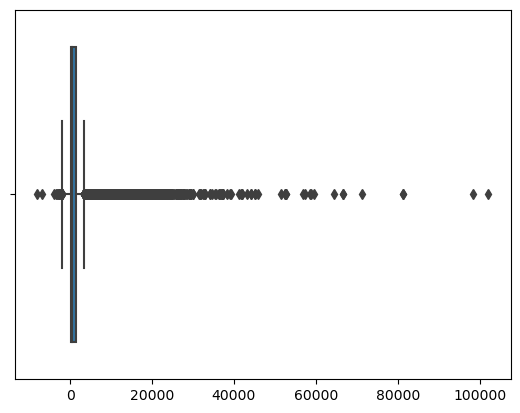

In [122]:
loan_balance=loan[["balance"]]
data=loan["balance"].values
sns.boxplot(x=data)

<Axes: >

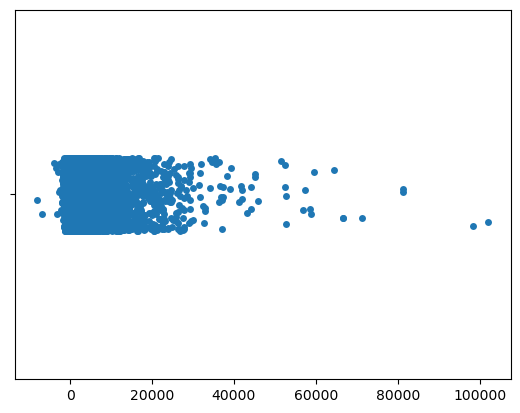

In [123]:
data=loan["balance"].values
sns.stripplot(x=data)

In [126]:
upper_limit=loan["balance"].mean()+3*loan["balance"].std()
lower_limit=loan["balance"].mean()-3*loan["balance"].std()
df_new=loan[(loan["balance"]>lower_limit) &(loan["balance"]<upper_limit)]

<Axes: xlabel='balance'>

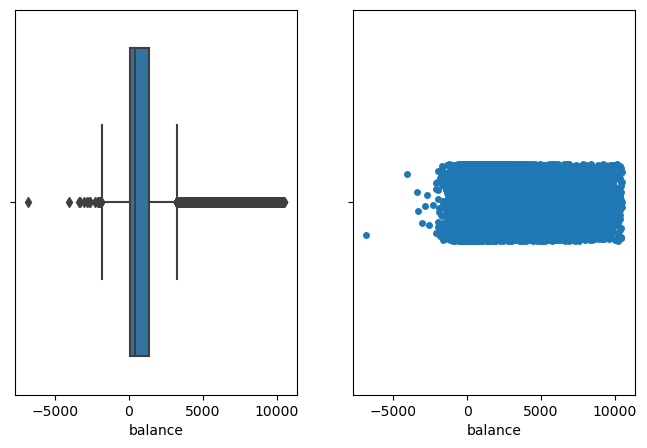

In [130]:
plt.figure(figsize=(8,5))
plt.title("after trimming")
plt.subplot(1,2,1)
sns.boxplot(x=df_new["balance"])
plt.subplot(1,2,2)
sns.stripplot(x=df_new["balance"])
